### Import the Dependenices 

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import streamlit as st

#### Here loading dummy datasets for the patients

In [5]:
df = pd.read_csv("/Users/mac/Desktop/CSV.FILE/health_data.csv")

In [6]:
df.head()

,Patient_ID,Blood_Sugar_mg/dL,Hemoglobin_g/dL,Cholesterol_mg/dL,Systolic_BP_mmHg,Diastolic_BP_mmHg,Health_Alerts
0,P0001,72,14.2,184,134,90,High Blood Pressure
1,P0002,137,15.2,250,129,82,High Cholesterol
2,P0003,173,9.5,131,134,82,"High Blood Sugar, Low Hemoglobin, High Blood P..."
3,P0004,140,14.2,189,140,69,High Blood Pressure
4,P0005,64,16.0,139,130,82,"Low Blood Sugar, High Blood Pressure"


In [7]:
df.tail()

,Patient_ID,Blood_Sugar_mg/dL,Hemoglobin_g/dL,Cholesterol_mg/dL,Systolic_BP_mmHg,Diastolic_BP_mmHg,Health_Alerts
995,P0996,73,13.7,220,101,79,High Cholesterol
996,P0997,111,11.7,207,127,74,"Low Hemoglobin, High Cholesterol"
997,P0998,86,10.8,160,157,64,"Low Hemoglobin, High Blood Pressure"
998,P0999,117,13.1,199,132,88,High Blood Pressure
999,P1000,63,15.3,115,124,84,Low Blood Sugar


In [8]:
df.shape

(1000, 7)

### Stage of Project

In [10]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvemnt depending on the Evaluation
# 7. Website
# 8. Deploy the model

### 1. Data Cleaning

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Patient_ID         1000 non-null   object 
 1   Blood_Sugar_mg/dL  1000 non-null   int64  
 2   Hemoglobin_g/dL    1000 non-null   float64
 3   Cholesterol_mg/dL  1000 non-null   int64  
 4   Systolic_BP_mmHg   1000 non-null   int64  
 5   Diastolic_BP_mmHg  1000 non-null   int64  
 6   Health_Alerts      1000 non-null   object 
dtypes: float64(1), int64(4), object(2)
memory usage: 54.8+ KB


In [13]:
df.isnull().sum()

Patient_ID           0
Blood_Sugar_mg/dL    0
Hemoglobin_g/dL      0
Cholesterol_mg/dL    0
Systolic_BP_mmHg     0
Diastolic_BP_mmHg    0
Health_Alerts        0
dtype: int64

In [14]:
df.duplicated().sum()

0

### 2.EDA

#### Summary Statistics

In [17]:
df['Health_Alerts'].value_counts()

Health_Alerts
High Blood Pressure                                                        193
Normal                                                                     170
High Cholesterol, High Blood Pressure                                      142
High Cholesterol                                                           102
Low Hemoglobin, High Blood Pressure                                         47
Low Hemoglobin, High Cholesterol, High Blood Pressure                       39
High Blood Sugar, High Blood Pressure                                       38
Low Hemoglobin                                                              37
High Blood Sugar, High Cholesterol, High Blood Pressure                     34
High Blood Sugar                                                            29
Low Blood Sugar, High Blood Pressure                                        24
High Blood Sugar, High Cholesterol                                          24
Low Hemoglobin, High Cholesterol      

### Class Distributions

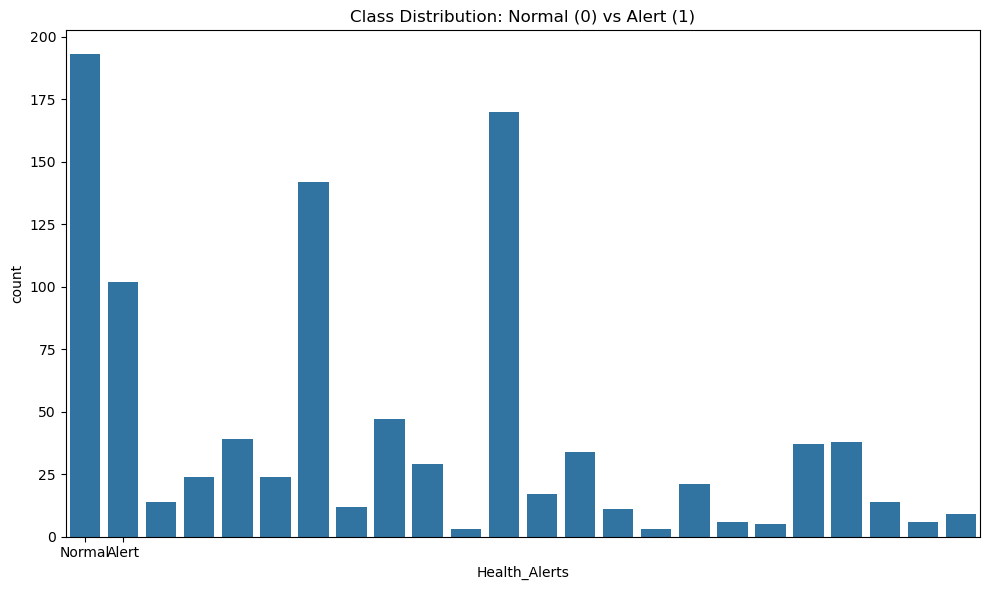

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Health_Alerts')
plt.title("Class Distribution: Normal (0) vs Alert (1)")
plt.xticks([0, 1], ["Normal", "Alert"])
plt.tight_layout()
plt.show()


### Features Distribution

In [21]:
df.head(0)

,Patient_ID,Blood_Sugar_mg/dL,Hemoglobin_g/dL,Cholesterol_mg/dL,Systolic_BP_mmHg,Diastolic_BP_mmHg,Health_Alerts


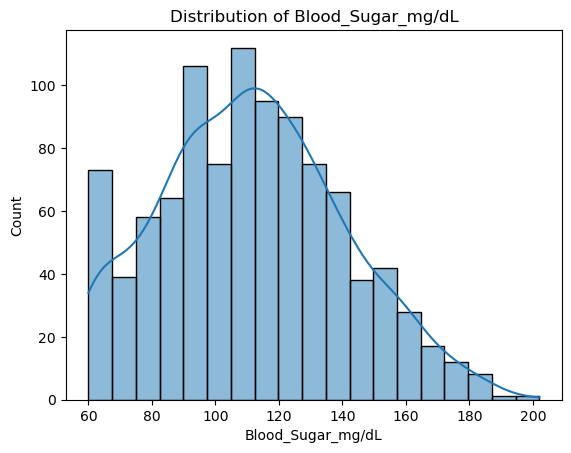

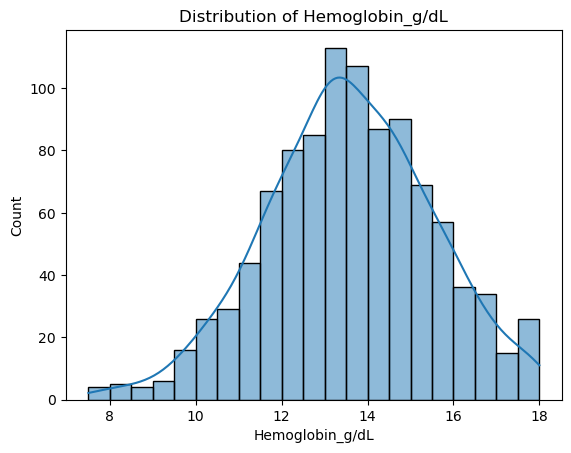

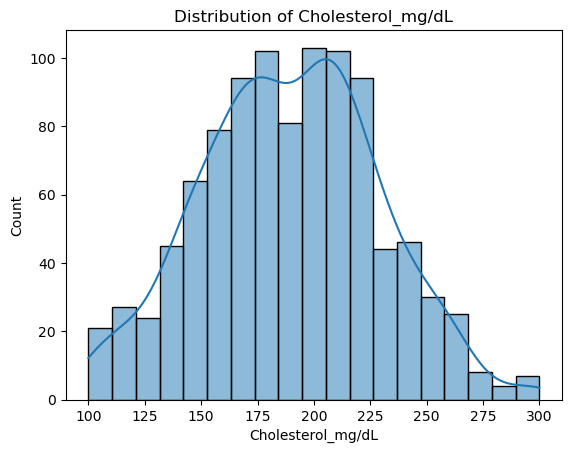

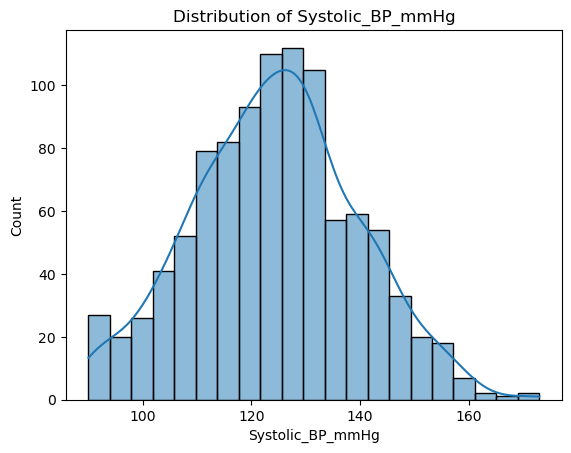

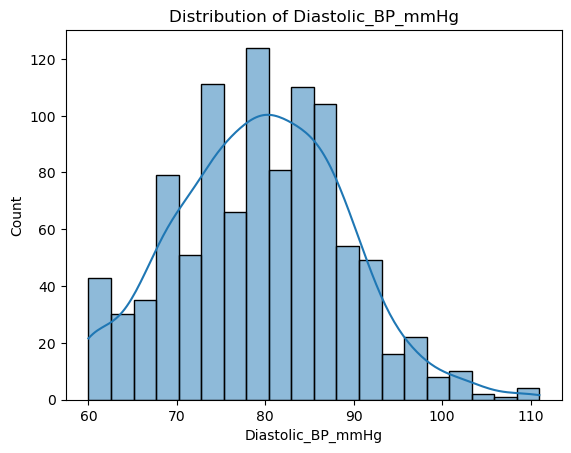

In [22]:
features = ['Blood_Sugar_mg/dL', 'Hemoglobin_g/dL', 'Cholesterol_mg/dL', 'Systolic_BP_mmHg', 'Diastolic_BP_mmHg']

for col in features:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


### Heatmap

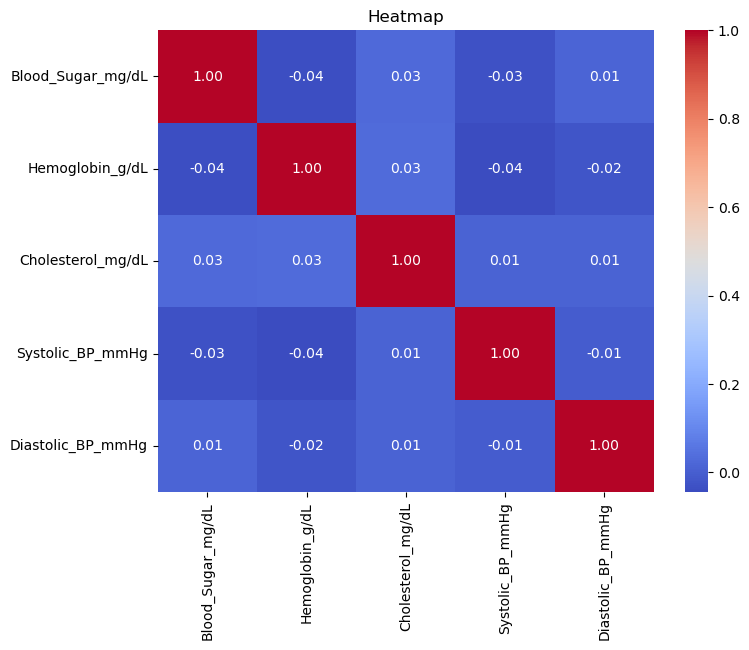

In [24]:
# Select only numerical features for Heatmap
features = ['Blood_Sugar_mg/dL', 'Hemoglobin_g/dL', 'Cholesterol_mg/dL', 
            'Systolic_BP_mmHg', 'Diastolic_BP_mmHg']

# correlation matrix
corr = df[features].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap")
plt.show()


### Pairplots

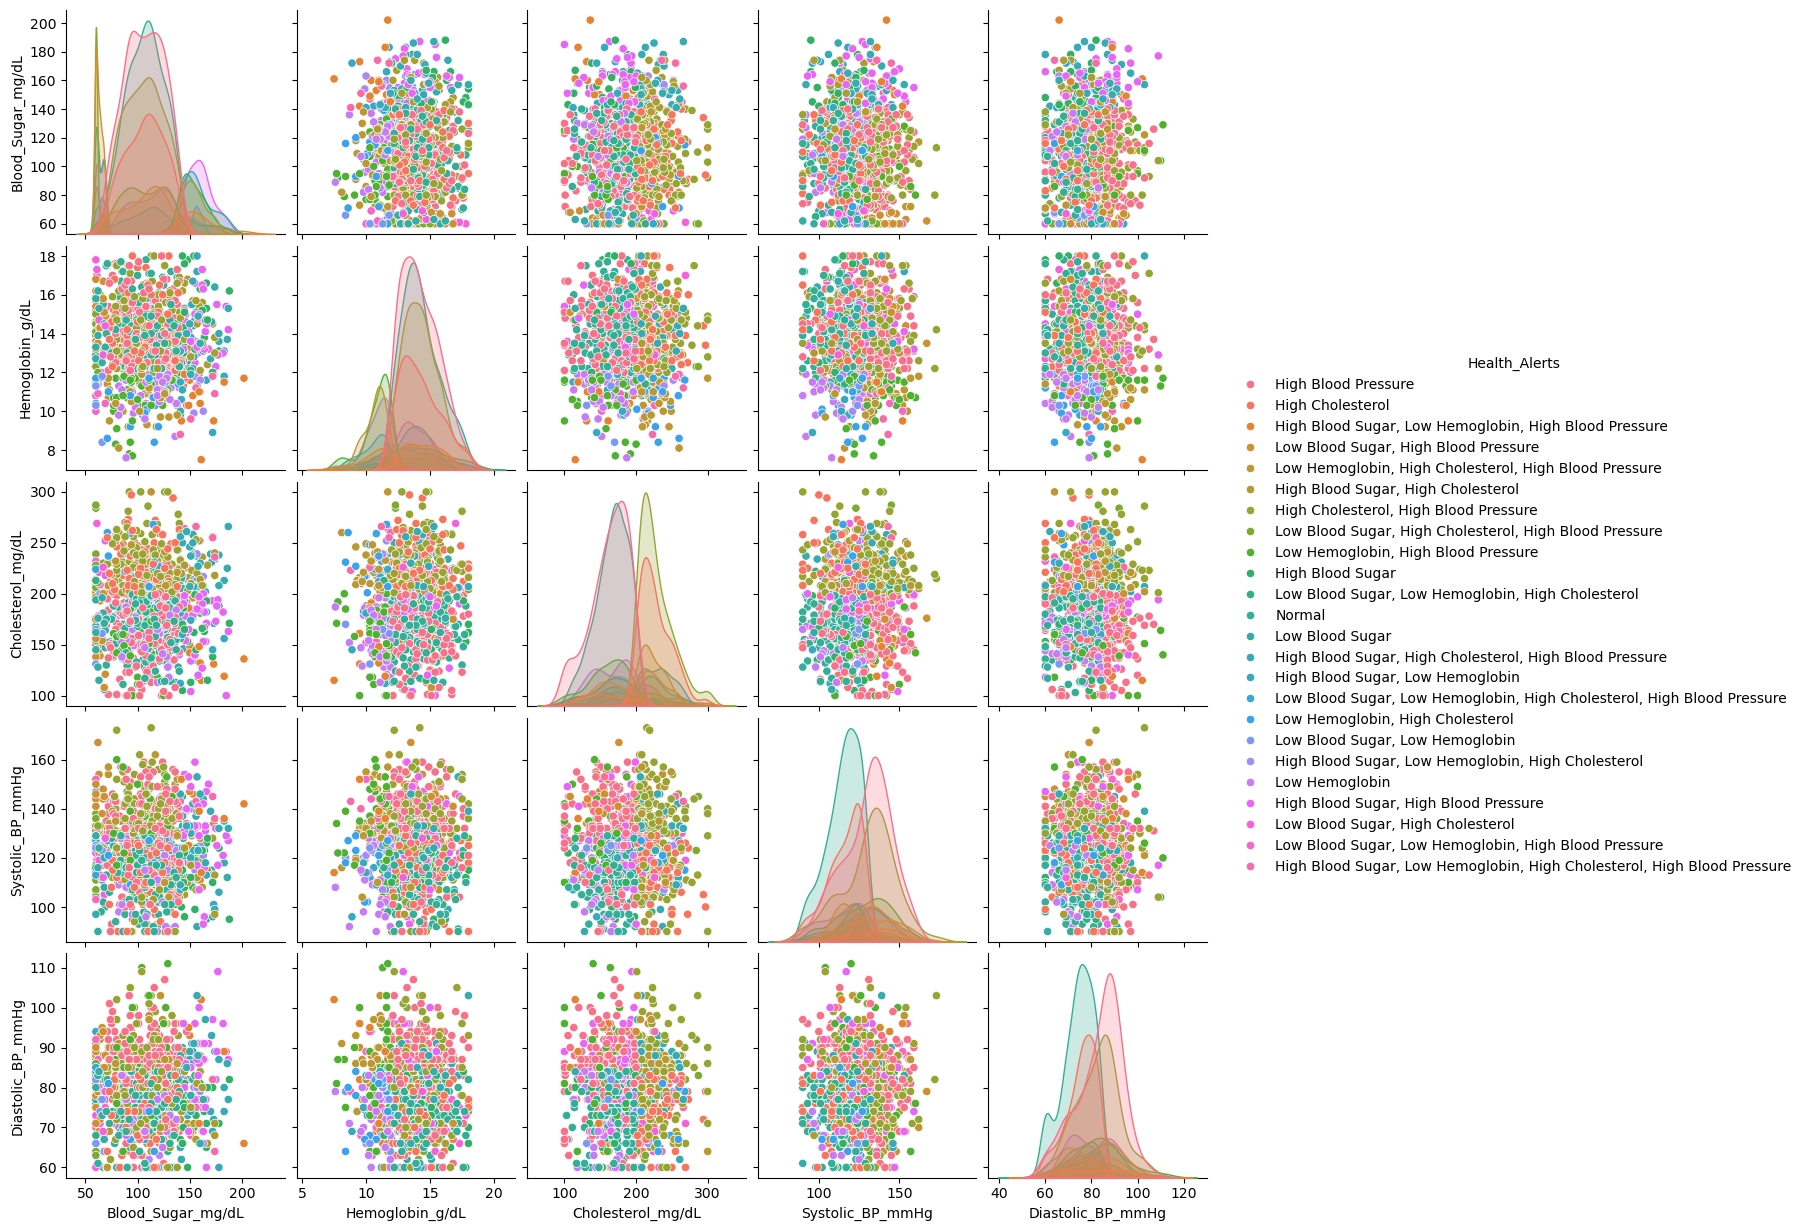

In [26]:
sns.pairplot(df[features + ['Health_Alerts']], hue='Health_Alerts')

In [27]:
# Create binary label
df['Health_Alerts'] = df['Health_Alerts'].apply(lambda x: 0 if x == 'Normal' else 1)


In [28]:
df['Health_Alerts'].sample(10)

441    1
949    1
233    1
661    1
876    1
719    1
340    1
997    1
941    1
770    1
Name: Health_Alerts, dtype: int64

### Label the Data

In [30]:
X = df[features]
Y = df['Health_Alerts']

In [31]:
X.head()

,Blood_Sugar_mg/dL,Hemoglobin_g/dL,Cholesterol_mg/dL,Systolic_BP_mmHg,Diastolic_BP_mmHg
0,72,14.2,184,134,90
1,137,15.2,250,129,82
2,173,9.5,131,134,82
3,140,14.2,189,140,69
4,64,16.0,139,130,82


In [32]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Health_Alerts, dtype: int64

### Train the data

In [34]:
# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


### Apply the Model

In [36]:
# Train Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [37]:
# Predict and evaluate
Y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00       168

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Confusion Matrix:
 [[ 32   0]
 [  0 168]]


In [67]:
import pickle

# Save your trained model (e.g., Decision Tree)
pickle_out = open("Health_Alerts.pkl", "wb")
pickle.dump(model, pickle_out)
pickle_out.close()


In [69]:
pickle_in = open("Health_Alerts.pkl", "rb")
model = pickle.load(pickle_in)
